# PROSPER LOAN DATA
## by TURYARUGAYO THOMPSON

## Investigation Overview

> I just focus on features that could affect the borrower APR, which are original loan amount, Prosper rating. I started by showing the distribution of borrower APR and loan amount variable. Then, I showed the relationship between APR vs. loan amount, as well as APR vs. rating. I also investigated the effect of term on ralationship between APR and loan amount.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others from the year 2009-2014.</br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("C:/Users/tturyarugayo/Downloads/prosperLoanData.csv")
print(data.head())
# Columns needed for my visualisation
columns = ['ListingKey','Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate','EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)', 
           'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
           'CreditScoreRangeUpper','AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
          'LoanOriginalAmount', 'MonthlyLoanPayment','Investors'
]
loans_data = data[columns]
loans_data.info()
# Create a copy for cleaning the data
loans = loans_data.copy()

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of BorrowerAPR

> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

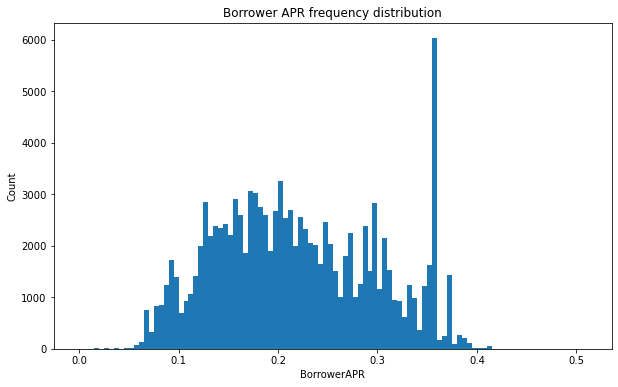

In [3]:
# Produce a barchart to visualise the distribution of borrowerAPR
plt.figure(figsize=(10,6))
b = np.arange(0,loans['BorrowerAPR'].value_counts().index.max(),0.005)
plt.hist(data = loans, x = 'BorrowerAPR', bins = b);
plt.title('Borrower APR frequency distribution');
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');

## Distribution of Loan Original Amount

> The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k,9k,11k,12k,13k,14k etc. It means that most of the loans are multiples of 1k.

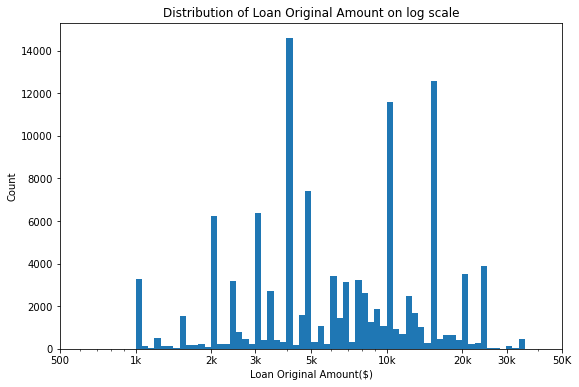

In [4]:
# Putting Loan Original Amount in a log-scale
plt.figure(figsize=(9,6))
log_binsize = 0.025
b = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data= loans,x='LoanOriginalAmount', bins=b)
plt.title('Distribution of Loan Original Amount on log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount($)')
plt.ylabel('Count');

## Distribution of Prosper Rating
> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
The plot looks not to be skewed in any direction. Most people has score ranging from 3.0 to 9.0. Score 4.0, 6.0 and 8.0 are among the highest frequencies.



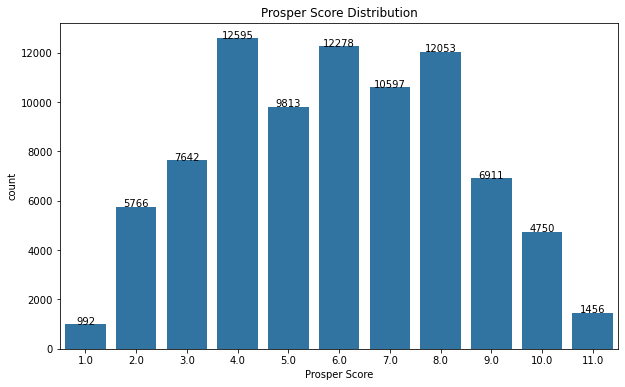

In [5]:
# produce a countplot to visualize the count of the prosperscore
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 6]);
sb.countplot(data= loans, x= 'ProsperScore', color= base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');
locs, labels = plt.xticks()
counts = loans['ProsperScore'].value_counts()
for loc, label in zip(locs, labels):
    count = counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black');

## Relationship between BorrowerAPR and Loan Original Amount
The borrower APR is negatively correlated with original loan amount. At different size of the loan amount, the APR has a large range, but the range of APR decreases with the increase of loan amount.

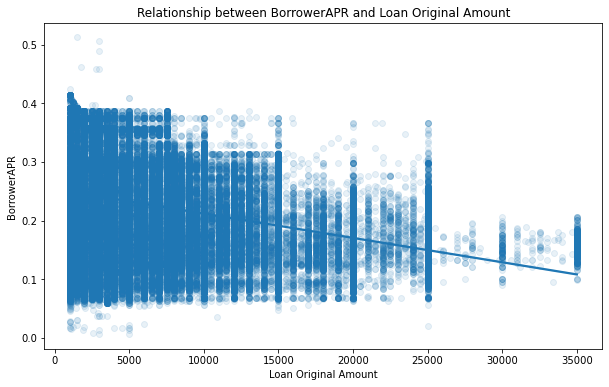

In [6]:
plt.figure(figsize=[10, 6]);
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',x_jitter=0.05, 
           scatter_kws={'alpha':0.1},color= base_color);
plt.xlabel('Loan Original Amount')
plt.ylabel('BorrowerAPR')
plt.title('Relationship between BorrowerAPR and Loan Original Amount');

## Relationship between BorrowerAPR and Prosper Rating
The higher the rating of the client, the lower the value of BorrowerAPR thus implying a good BorrowerAPR and the BorrowerAPR increases with a decrease in the prosper rating.

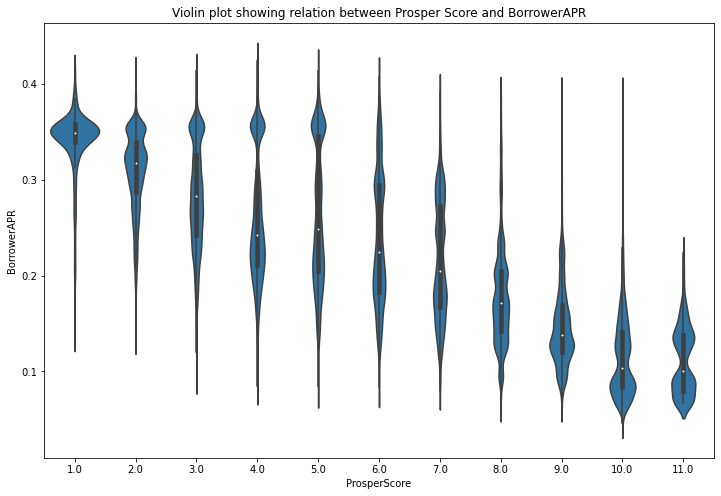

In [7]:
# Plot a violin plot ot help visualise the BorrowerAPr with prosper score
plt.figure(figsize = [12, 8])
sb.violinplot(data=loans, x='ProsperScore', y='BorrowerAPR', color=base_color, innner=None)
plt.title('Violin plot showing relation between Prosper Score and BorrowerAPR');

## Relationship between BorrowerAPR, Loan Original Amount and Prosper Rating.
> Clients with high Loan Original Amount have a low BorrowerAPR thereby having a high/good properscore and clients who are offered low original loan amounts have a high borrower APR therby attaining a low prosper score. This simply implies that these variables are related.

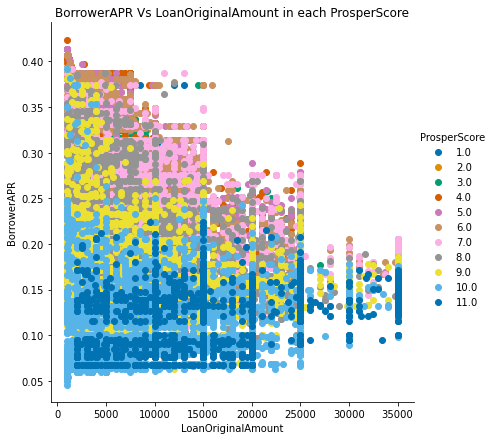

In [8]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
g = sb.FacetGrid(data = loans, hue = 'ProsperScore', size = 6,palette = 'colorblind');
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');
plt.title('BorrowerAPR Vs LoanOriginalAmount in each ProsperScore');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('BorrowerAPR');
g.add_legend();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
